# Emotion Recognition using Classification
## Data loading functions

In [3]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import brewer2mpl

def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

def load_data(usage='Training',classes=['Angry','Happy'], filepath='fer2013.csv'):
    """
    The function load provided CSV dataset and further reshape, rescale the data for feeding
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

## Specify our label conversion and load data

In [4]:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

file_path = 'fer2013.csv'

X_test, y_test = load_data(classes=emo, usage='PrivateTest', filepath=file_path)
X_train, y_train = load_data(classes=emo, usage='Training', filepath=file_path)
X_val,y_val = load_data(classes=emo, usage='PublicTest', filepath=file_path)

Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


## Count samples in each label category

In [5]:
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
X = np.load(X_fname)
y = np.load(y_fname)
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (labels)
print (counts)

Private test set
['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
[546 528 879 594 416 626]


## Plot one image with size

(1, 48, 48, 1)


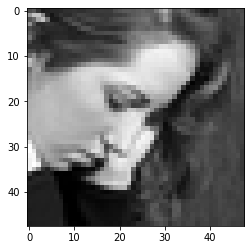

In [6]:
input_img = X[6:7,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

## Set up variables for processing

In [7]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

## Import scikit-learn functions for classification

In [8]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, Normalizer
from sklearn.pipeline import make_pipeline

## Initialize classifier for training

In [9]:
full_pipeline = make_pipeline(
    FunctionTransformer(lambda x: x.reshape((x.shape[0],-1)), validate = False), 
    Normalizer(),
    ######### TODO: Put your classifier name ######

    
    
    
    ###############################################

)

## Prepare label data and train classifier

In [10]:
%%time
print(y_train, y_test)
###### Change y_train and y_test data from binary to integer array
###### Hint: create y_train_cat and y_test_cat variables #########


##################################################################
print(y_train_cat, y_test_cat)
full_pipeline.fit(X_train, y_train_cat)

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]] [[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[5 0 3 ... 5 2 2] [2 3 2 ... 5 2 5]
CPU times: user 8.37 s, sys: 360 ms, total: 8.73 s
Wall time: 10.8 s


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x1388ebea0>)),
                ('normalizer', Normalizer()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

## Make classifier predictions on new data

In [11]:
%%time
y_train_pred = full_pipeline.predict(X_train)
y_pred = full_pipeline.predict(X_test)

CPU times: user 57min 19s, sys: 20 s, total: 57min 39s
Wall time: 59min 16s


## Import scikit-learn functions for analyzing results

In [12]:
from sklearn.metrics import classification_report, classification

## Plot confusion matrices of results

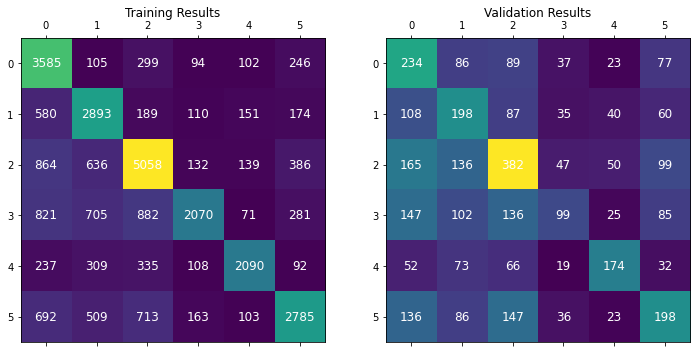

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
cm_train = classification.confusion_matrix(y_train_cat, y_train_pred)
cm_test = classification.confusion_matrix(y_test_cat, y_pred)
ax1.matshow(cm_train)
ax1.set_title('Training Results')
ax2.matshow(cm_test)
ax2.set_title('Validation Results')

for (i,j), z in np.ndenumerate(cm_train):
    ax1.text(j, i, '{:d}'.format(z), ha='center', va='center', 
             color='white', fontsize='large')
for (i,j), z in np.ndenumerate(cm_test):
    ax2.text(j, i, '{:d}'.format(z), ha='center', va='center', 
             color='white', fontsize='large')

## Print classification performance

In [14]:
print(classification_report(y_test_cat, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.43      0.34       546
           1       0.29      0.38      0.33       528
           2       0.42      0.43      0.43       879
           3       0.36      0.17      0.23       594
           4       0.52      0.42      0.46       416
           5       0.36      0.32      0.34       626

    accuracy                           0.36      3589
   macro avg       0.37      0.36      0.35      3589
weighted avg       0.37      0.36      0.35      3589



## Get a list of true class labels

In [15]:
print(y_test)

label_correct = list()
############ create a list of correct labels as emotions







########################################################
print(label_correct)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
['Happy', 'Sad', 'Happy', 'Neutral', 'Fear', 'Surprise', 'Happy', 'Angry', 'Surprise', 'Fear', 'Sad', 'Sad', 'Fear', 'Happy', 'Happy', 'Angry', 'Angry', 'Sad', 'Happy', 'Neutral', 'Fear', 'Happy', 'Angry', 'Sad', 'Fear', 'Happy', 'Angry', 'Happy', 'Angry', 'Happy', 'Fear', 'Neutral', 'Happy', 'Fear', 'Happy', 'Fear', 'Neutral', 'Sad', 'Neutral', 'Angry', 'Sad', 'Happy', 'Angry', 'Sad', 'Happy', 'Neutral', 'Happy', 'Fear', 'Fear', 'Angry', 'Neutral', 'Fear', 'Happy', 'Neutral', 'Neutral', 'Happy', 'Surprise', 'Surprise', 'Angry', 'Sad', 'Angry', 'Fear', 'Angry', 'Surprise', 'Happy', 'Sad', 'Neutral', 'Surprise', 'Happy', 'Sad', 'Surprise', 'Surprise', 'Sad', 'Happy', 'Angry', 'Happy', 'Angry', 'Happy', 'Happy', 'Sad', 'Angry', 'Neutral', 'Happy', 'Angry', 'Happy', 'Sad', 'Angry', 'Angry', 'Happy', 'Sad', 'Neutral', 'Sad', 'Sad', 'Happy', 'Fear', 'Happy', 'S

## Get a list of predicted class labels

In [16]:
print(y_train_pred)
Label_pred = list()
for i in y_train_pred:
    Label_pred.append(emo[i])

[5 0 3 ... 1 4 2]


## Plot images with true and predicted labels

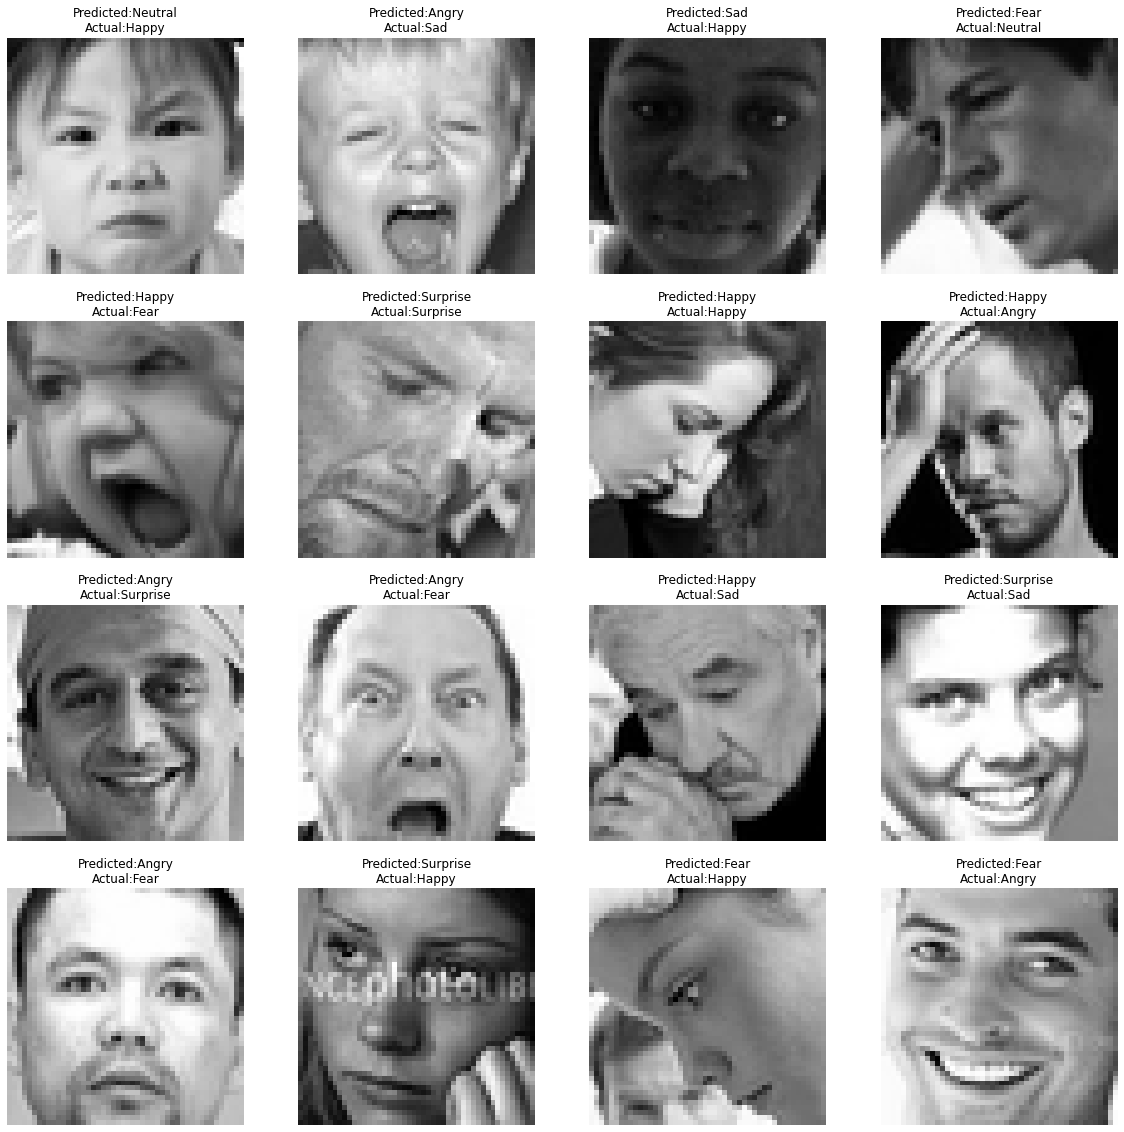

In [17]:
fig, m_ax = plt.subplots(4, 4, figsize = (20, 20))
########### Print images with predicted and actual emotion labels ####################




######################################################################################